---
## 一、层次分析法
层次分析法（Analytic Hierarchy Process，简称AHP）是一种多准则决策分析方法，它可以将复杂的决策问题分解为层次结构，通过对各层次元素之间的比较和权重分配，得出最终的决策结果。

#### 1.层次结构：
1. 目标层
2. 准则层
3. 方案层
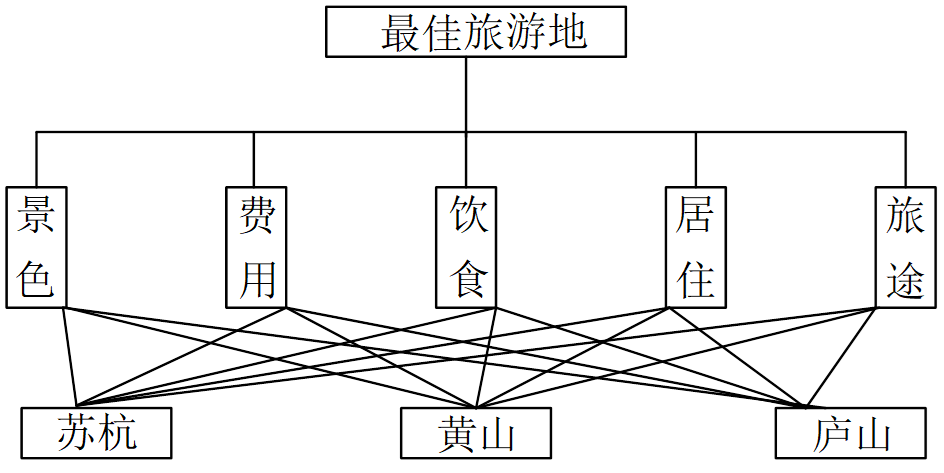

#### 2.赋权：
1. 准则层对目标层赋权：
    1. 根据准则的重要性，两两比较判断法构造判断矩阵
    2. 求最大特征值、特征向量。
    3. 对应特征向量归一化，就是权重值
2. 方案层对准则层同理。

#### 3.模型的一致性检验：   
如果判断矩阵不具有一致性，则$\lambda_{max} \ne n$，此时特征向量W不能真实反映各指标的权重。   
指标：CI指标、RI指标

In [2]:
from scipy.sparse.linalg import eigs
from numpy import array, hstack

a=array([
    [1,1/2,5,5,3],
    [2,1,7,7,5],
    [1/5,1/7,1,1/2,1/3],
    [1/5,1/7,2,1,1/2],
    [1/3,1/5,3,2,1]])
L,V=eigs(a,1);
CR=(L-5)/4/1.12  #计算矩阵A的一致性比率
W=V/sum(V); print("最大特征值为：",L)
print("最大特征值对应的特征向量W=\n",W)
print("CR=",CR)

B1=array([
    [1,1/3,1/2],
    [3,1,1/2],
    [2,2,1]])
L1,P1=eigs(B1,1); P1=P1/sum(P1)
print("P1=",P1)

B2=array([
    [1,3,2],
    [1/3,1,2],
    [1/2,1/2,1]])
t2,P2=eigs(B2,1); P2=P2/sum(P2)
print("P2=",P2)

B3=array([
    [1,4,3],
    [1/4,1,2],
    [1/3,1/2,1]])
t3, P3=eigs(B3,1); P3=P3/sum(P3)
print("P3=",P3)

B4=array([
    [1,3,2],
    [1/3,1,2],
    [1/2,1/2,1]])
t4, P4=eigs(B4,1); P4=P4/sum(P4)
print("P4=", P4)

B5=array([
    [1,2,3],[1/2,1,1/2],[1/3,2,1]])
t5, P5=eigs(B5,1); P5=P5/sum(P5)
print("P5=",P5)

K=hstack([P1,P2,P3,P4,P5])@W  #矩阵乘法
print("K=",K)
print(hstack([P1,P2,P3,P4,P5]).shape,W.shape)


最大特征值为： [5.09758844+0.j]
最大特征值对应的特征向量W=
 [[0.28626525+0.j]
 [0.48093287+0.j]
 [0.04851865+0.j]
 [0.0685439 +0.j]
 [0.11573932+0.j]]
CR= [0.02178313+0.j]
P1= [[0.16765631+0.j]
 [0.34873919+0.j]
 [0.4836045 +0.j]]
P2= [[0.54721643+0.j]
 [0.26307422+0.j]
 [0.18970934+0.j]]
P3= [[0.63009766-0.j]
 [0.21844266-0.j]
 [0.15145968-0.j]]
P4= [[0.54721643+0.j]
 [0.26307422+0.j]
 [0.18970934+0.j]]
P5= [[0.54721643+0.j]
 [0.18970934+0.j]
 [0.26307422+0.j]]
K= [[0.44258285+0.j]
 [0.27694046+0.j]
 [0.28047669+0.j]]
(3, 5) (5, 1)


如果说数学规划是在无限的可行域中寻找最优解，评价模型就是用来**在有限的、已给出的几个选择中选择最符合要求的**。